In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("diamonds.csv")

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
lb=LabelEncoder()

In [7]:
df["cut_encoded"]=lb.fit_transform(df['cut'])
df["color_encoded"]=lb.fit_transform(df['color'])
df["clarity_encoded"]=lb.fit_transform(df['clarity'])

In [8]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,0,2
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,0,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,4,0,2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3,4,3


<AxesSubplot:>

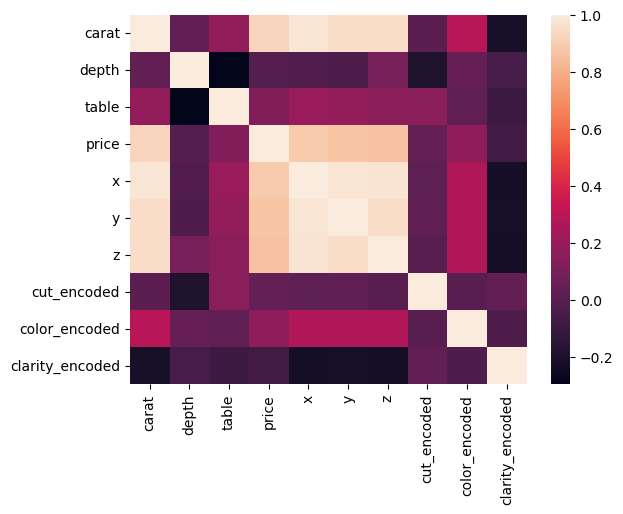

In [9]:
sns.heatmap(df.corr())

In [10]:
df.corr()

,carat,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.017124,0.291437,-0.214290
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,-0.194249,0.047279,-0.053080
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.150327,0.026465,-0.088223
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.039860,0.172511,-0.071535
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.022342,0.270287,-0.225721
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.027572,0.263584,-0.217616
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.002037,0.268227,-0.224263
cut_encoded,0.017124,-0.194249,0.150327,0.039860,0.022342,0.027572,0.002037,1.000000,0.000304,0.028235
color_encoded,0.291437,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227,0.000304,1.000000,-0.027795
clarity_encoded,-0.214290,-0.053080,-0.088223,-0.071535,-0.225721,-0.217616,-0.224263,0.028235,-0.027795,1.000000


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr=LinearRegression()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=df[['carat','table','x','y','z','color_encoded']]
y=df['price']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2529)

In [16]:
x_train

,carat,table,x,y,z,color_encoded
34306,0.36,63.0,4.46,4.51,2.80,2
22196,1.61,55.0,7.49,7.52,4.68,5
21019,1.30,55.2,6.94,6.97,4.36,4
25433,2.04,58.0,8.11,8.06,5.08,4
6444,0.72,56.0,5.77,5.81,3.57,0
...,...,...,...,...,...,...
3656,0.80,60.0,5.94,5.89,3.72,0
22927,1.57,58.0,7.55,7.59,4.57,5
35644,0.31,56.0,4.38,4.35,2.68,3
7730,0.30,59.0,4.27,4.34,2.67,4


In [17]:
y_test

39554     1080
29587      706
2525      3204
40511     1144
33339      827
         ...  
24629    12964
32640      802
7206      4191
35997      921
8893      4488
Name: price, Length: 13485, dtype: int64

In [18]:
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
lr.score(x_test,y_test)

0.8605837962581273

In [20]:
import pickle

In [21]:
# Save the model to a file using pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(lr, model_file)